In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('../data/S&P 500 Consumer Staples 50-Day.csv')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data = data.sort_values(by=['date'])
data = data.dropna()
data

,date,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),S&P 500 Consumer Staples (Sector) Outperform/Underperform,overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel
4178,2009-12-02,1109.24,279.739990,1.312485,1.395475,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4179,2009-12-03,1099.92,277.600006,0.037289,-0.111546,UNDERPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4180,2009-12-04,1105.98,278.859985,-0.069573,-0.360885,UNDERPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4181,2009-12-07,1103.25,278.690002,-0.533732,-0.506938,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4182,2009-12-08,1091.94,275.989990,-1.450348,-1.319366,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,2021-11-24,4701.46,759.030029,4.852728,-4.228171,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7195,2021-11-26,4594.62,748.440002,1.616263,-5.874366,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7196,2021-11-29,4655.27,752.330017,1.484354,-5.401798,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7197,2021-11-30,4567.00,731.760010,1.396956,-7.028511,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310


## Using all data

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dow'] = data['date'].dt.dayofweek
data = data[data['dow']==3].groupby(['year','month']).nth[1].reset_index()
data

,year,month,date,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),S&P 500 Consumer Staples (Sector) Outperform/Underperform,overall,food and beverages,...,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,2009,12,2009-12-10,1102.35,277.260010,-0.261482,-1.006847,UNDERPERFORM,217.488,218.855,...,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083,3
1,2010,1,2010-01-14,1148.46,279.160004,-2.110431,-3.505007,UNDERPERFORM,217.281,218.898,...,204.675,126.819,99.689,785.135,220.258,128.812,114.772,117.864,109.921,3
2,2010,2,2010-02-11,1078.47,273.260010,-11.020997,-4.833880,OUTPERFORM,217.353,219.321,...,204.268,126.420,99.369,789.437,221.409,128.068,114.977,118.207,110.556,3
3,2010,3,2010-03-11,1150.24,282.130005,5.750719,3.257327,UNDERPERFORM,217.403,219.531,...,203.898,125.751,98.753,793.360,221.387,128.296,114.794,117.661,109.688,3
4,2010,4,2010-04-08,1186.44,286.839996,6.168177,4.210716,UNDERPERFORM,217.290,219.651,...,203.461,125.687,98.588,803.484,221.727,127.650,114.873,117.508,109.725,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,7,2021-07-08,4320.82,720.650024,-2.530346,-2.372108,OUTPERFORM,273.092,278.062,...,242.236,132.316,96.118,1254.492,268.392,138.788,113.605,119.623,102.393,3
140,2021,8,2021-08-12,4460.83,743.869995,-1.849766,0.423908,OUTPERFORM,274.214,280.413,...,243.569,133.582,97.280,1263.542,271.322,139.549,114.660,119.364,100.292,3
141,2021,9,2021-09-09,4493.28,747.330017,-4.490556,-0.665924,OUTPERFORM,276.590,282.661,...,246.523,134.667,98.022,1287.067,274.278,139.544,115.831,120.101,101.919,3
142,2021,10,2021-10-14,4438.26,736.159973,-7.366228,-7.193465,OUTPERFORM,278.524,284.676,...,249.378,135.808,98.848,1298.746,275.508,140.361,115.896,122.129,102.875,3


In [4]:
original = data[['S&P 500 Consumer Staples (Sector) Outperform/Underperform','month','overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]

In [5]:
data.drop(columns=['date','S&P 500 Consumer Staples (Sector) Outperform/Underperform','year'], inplace=True)
data.head()

,month,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,12,1102.35,277.260010,-0.261482,-1.006847,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083,3
1,1,1148.46,279.160004,-2.110431,-3.505007,217.281,218.898,218.552,204.675,126.819,99.689,785.135,220.258,128.812,114.772,117.864,109.921,3
2,2,1078.47,273.260010,-11.020997,-4.833880,217.353,219.321,218.990,204.268,126.420,99.369,789.437,221.409,128.068,114.977,118.207,110.556,3
3,3,1150.24,282.130005,5.750719,3.257327,217.403,219.531,219.209,203.898,125.751,98.753,793.360,221.387,128.296,114.794,117.661,109.688,3
4,4,1186.44,286.839996,6.168177,4.210716,217.290,219.651,219.331,203.461,125.687,98.588,803.484,221.727,127.650,114.873,117.508,109.725,3


In [6]:
original['Performance'] = np.where(original['S&P 500 Consumer Staples (Sector) Outperform/Underperform'] == 'OUTPERFORM',1,0)
original = original[['Performance','month','overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]

In [7]:
dd.data_summary(original)

,Info
Rows,144
Columns,14
Size in Memory,15.9 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,1,1,0.59,0.49,2,85
month,int64,0,0,1,6.50,12,6.50,3.45,12,12
overall,float64,0,0,217.20,238.025,280.13,241.74,14.75,142,2
food and beverages,float64,0,0,218.85,247.53,286.018,246.67,15.53,144,1
food,float64,0,0,218.49,247.74,287.44,246.92,15.83,144,1
nondurables,float64,0,0,202.87,223.85,250.94,222.54,8.43,143,2
household furnishings and operations,float64,0,0,120.28,124.20,137.30,124.32,2.96,144,1
household furnishings and supplies,float64,0,0,89.35,93.52,100.22,94.082,3.18,143,2
tobacco and smoking products,float64,0,0,784.69,949.31,1308.024,983.34,138.14,144,1
domestically produced farm food,float64,0,0,219.86,247.36,276.52,245.84,11.52,144,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

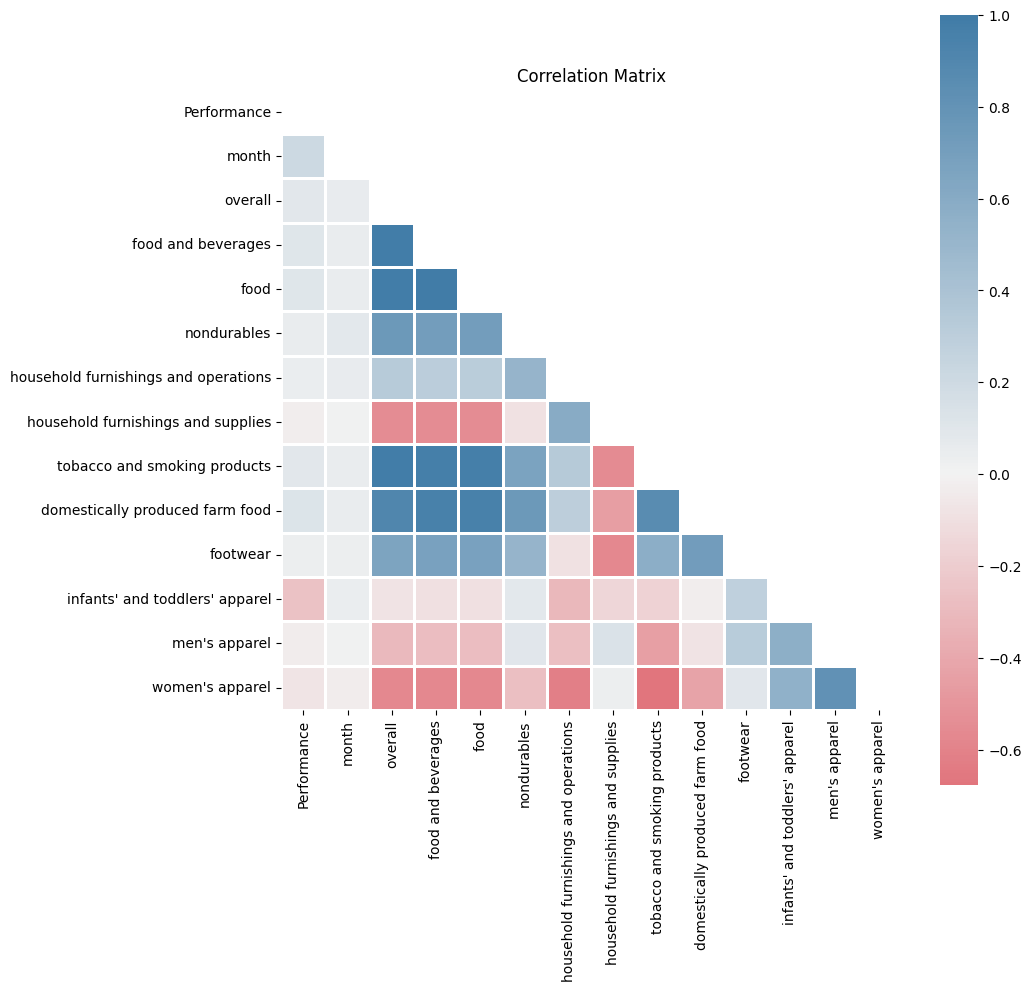

In [8]:
dd.correlation_matrix(original)

### Conditional GAN

In [9]:
discrete_columns = [
    'month'
]

ctgan = CTGAN(epochs=5000)
ctgan.fit(data, discrete_columns)

# Synthetic copy
samples = ctgan.sample(10000)
samples

,month,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,3,1270.940855,305.867421,5.178907,-2.594741,235.582787,241.748209,237.922997,201.035734,122.827611,99.644808,870.953350,217.988142,129.415828,118.651444,122.750172,110.782954,3
1,10,2417.809638,527.834263,-4.236511,-3.617955,259.911231,275.397448,271.651906,227.736343,125.012806,91.314102,1177.136523,254.917587,135.861120,115.913225,118.183604,100.356063,3
2,5,951.178093,358.168436,-3.143244,-2.631017,225.668402,224.658602,228.713313,205.259666,126.800414,98.607248,815.941294,238.637520,125.978912,115.523158,124.525683,114.758194,3
3,1,668.587135,290.651288,-5.898195,-6.883945,218.247021,214.206097,225.245759,203.660505,124.221189,98.627513,799.870612,228.280515,128.149180,115.859062,119.625793,107.848970,3
4,11,2444.356353,610.958124,-7.339176,-5.164202,253.370853,250.547560,252.819063,219.367344,122.563089,92.193462,1105.071433,248.800742,135.719750,114.676055,120.717063,108.120934,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7,2748.439198,553.463465,6.794744,-4.235987,267.738227,261.411862,270.382163,225.689099,122.679499,91.939495,930.026496,248.198866,136.562233,117.981343,125.468254,115.799768,3
9996,8,2145.332179,590.024885,-2.932514,-3.906535,258.136217,252.178403,250.539977,223.704573,121.900805,91.866614,942.953980,251.663844,137.889593,123.198912,123.259786,114.238909,3
9997,9,2410.553760,598.666042,-4.590622,-1.898037,245.684776,234.336963,253.453449,228.194698,123.941686,97.448372,1007.890079,248.349825,133.741050,120.668093,123.374750,116.536875,3
9998,4,1496.868232,403.649688,0.226767,-1.516887,250.817284,235.583191,237.591531,219.137066,122.838870,96.585672,857.864754,246.285655,134.476479,116.402120,123.923199,115.823417,3


In [10]:
samples['Performance'] = np.where(samples['S&P 500 Consumer Staples (Sector) Performance (%)'] > \
                                  samples['S&P 500 Performance (%)'], 1, 0)

In [11]:
samples = samples[['Performance','month', 'overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]
samples.head()

,Performance,month,overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel
0,0,3,235.582787,241.748209,237.922997,201.035734,122.827611,99.644808,870.953350,217.988142,129.415828,118.651444,122.750172,110.782954
1,1,10,259.911231,275.397448,271.651906,227.736343,125.012806,91.314102,1177.136523,254.917587,135.861120,115.913225,118.183604,100.356063
2,1,5,225.668402,224.658602,228.713313,205.259666,126.800414,98.607248,815.941294,238.637520,125.978912,115.523158,124.525683,114.758194
3,0,1,218.247021,214.206097,225.245759,203.660505,124.221189,98.627513,799.870612,228.280515,128.149180,115.859062,119.625793,107.848970
4,1,11,253.370853,250.547560,252.819063,219.367344,122.563089,92.193462,1105.071433,248.800742,135.719750,114.676055,120.717063,108.120934


In [12]:
dd.data_summary(samples)

,Info
Rows,10000
Columns,14
Size in Memory,1.1 MB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,1,1,0.60,0.49,2,6037
month,int64,0,0,1,6,12,6.49,3.44,12,881
overall,float64,0,0,208.19,243.82,295.052,244.94,15.81,10000,1
food and beverages,float64,0,0,205.58,246.41,308.00,246.26,16.60,9999,2
food,float64,0,0,207.99,249.46,310.46,250.87,18.13,10000,1
nondurables,float64,0,0,189.32,223.62,258.51,221.53,9.71,10000,1
household furnishings and operations,float64,0,0,118.24,124.016,144.061,124.50,3.20,9999,2
household furnishings and supplies,float64,0,0,87.51,93.24,100.58,94.18,3.23,10000,1
tobacco and smoking products,float64,0,0,702.26,942.11,1438.60,989.29,146.83,10000,1
domestically produced farm food,float64,0,0,207.20,247.38,278.70,244.81,11.72,10000,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

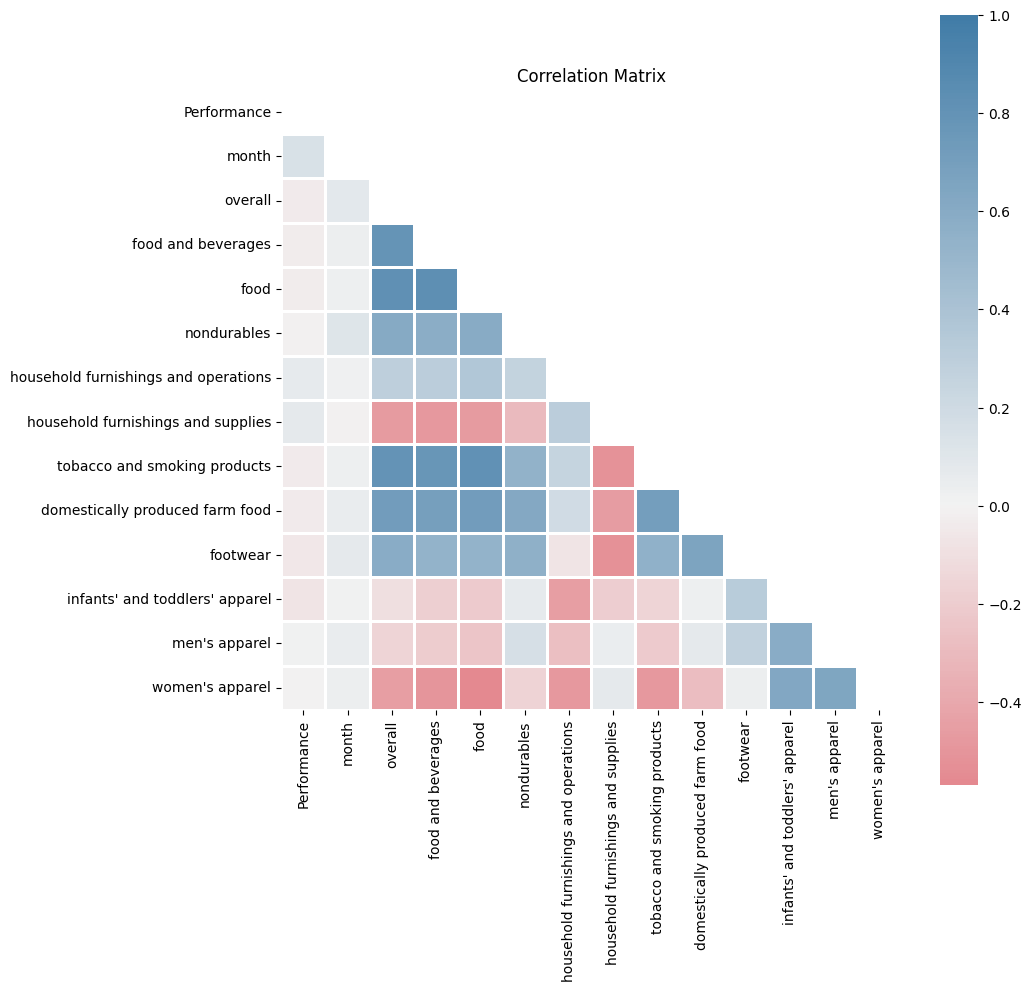

In [13]:
dd.correlation_matrix(samples)

In [14]:
X = samples.drop(['Performance'],axis=1)
y = samples['Performance']

### SMOTE Oversampling

In [15]:
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 6037, 0: 3963})
Counter({0: 6037, 1: 6037})


### Interaction Terms

In [16]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(X.drop(['month'],axis=1))
X_poly

array([[  235.58278709,   241.74820853,   237.92299728, ...,
        14564.48510629, 13144.55737455, 13598.62659481],
       [  259.91123136,   275.39744804,   271.65190611, ...,
        13699.04275782, 11632.5949283 , 11860.44121095],
       [  225.66840224,   224.65860248,   228.71331312, ...,
        14385.60015888, 13257.22895537, 14290.34243417],
       ...,
       [  230.62642995,   228.70507738,   230.66287489, ...,
        13447.77955633, 12657.96436508, 13073.09778199],
       [  237.54040391,   246.46000429,   255.32058751, ...,
        14977.63516025, 13927.43968309, 14313.32354852],
       [  258.99468368,   252.02609159,   252.58436135, ...,
        14893.44575853, 13878.21131511, 14402.78472862]])

In [17]:
month = X['month'].to_numpy()
month = np.reshape(month,(-1,1))
X = np.append(X_poly,month,1)
X.shape

(12074, 79)

In [18]:
X_real = original.drop(['Performance'],axis=1)
y_real = original['Performance']
X_real_poly = poly.fit_transform(X_real.drop(['month'],axis=1))
month = X_real['month'].to_numpy()
month = np.reshape(month,(-1,1))
X_real = np.append(X_real_poly,month,1)
X_real.shape

(144, 79)

In [19]:
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X_real = stscaler.transform(X_real)

### Training with CV

In [20]:
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())

k_fold = StratifiedKFold(n_splits=10)

Model_Comparison = pd.DataFrame(columns=['Name', 'CV Mean Accuracy', 'CV Mean Precision', 'CV Mean Recall',\
                                         'CV Mean F-1 Score', \
                                         'Accuracy', 'Precision', 'Recall', 'F-1 Score',\
                                        'Accuracy Real', 'Precision Real', 'Recall Real', 'F-1 Score Real'])
row = 0
for clf in classifiers:
    name = clf.__class__.__name__
    Model_Comparison.loc[row, 'Name'] = name
    
    Model_Comparison.loc[row, 'CV Mean Accuracy'] = cross_val_score(clf, X, y, scoring = 'accuracy', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Precision'] = cross_val_score(clf, X, y, scoring = 'precision',\
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Recall'] = cross_val_score(clf, X, y, scoring = 'recall', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean F-1 Score'] = cross_val_score(clf, X, y, scoring = 'f1', \
                                                                 cv = k_fold, n_jobs = 10).mean()

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    Model_Comparison.loc[row, 'Accuracy'] = accuracy_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Precision'] = precision_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Recall'] = recall_score(y_test, y_pred)
    Model_Comparison.loc[row, 'F-1 Score'] = f1_score(y_test, y_pred)
    
    y_pred = clf.predict(X_real)
    Model_Comparison.loc[row, 'Accuracy Real'] = accuracy_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Precision Real'] = precision_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Recall Real'] = recall_score(y_real, y_pred)
    Model_Comparison.loc[row, 'F-1 Score Real'] = f1_score(y_real, y_pred)
    
    row += 1
Model_Comparison

,Name,CV Mean Accuracy,CV Mean Precision,CV Mean Recall,CV Mean F-1 Score,Accuracy,Precision,Recall,F-1 Score,Accuracy Real,Precision Real,Recall Real,F-1 Score Real
0,KNeighborsClassifier,0.63849,0.679415,0.541158,0.600728,0.638291,0.660499,0.550637,0.600585,0.590278,0.69697,0.541176,0.609272
1,DecisionTreeClassifier,0.619271,0.628028,0.600128,0.612579,0.624379,0.624044,0.60228,0.612969,0.625,0.731343,0.576471,0.644737
2,RandomForestClassifier,0.712869,0.742143,0.678983,0.70529,0.691951,0.696566,0.666667,0.681289,0.680556,0.746835,0.694118,0.719512
3,AdaBoostClassifier,0.632273,0.645163,0.590525,0.616324,0.624048,0.627325,0.588196,0.60713,0.638889,0.689655,0.705882,0.697674
4,GradientBoostingClassifier,0.652322,0.668615,0.609739,0.63741,0.641272,0.646763,0.602951,0.624089,0.652778,0.721519,0.670588,0.695122
5,ExtraTreesClassifier,0.729848,0.759939,0.703331,0.725549,0.703875,0.713672,0.668679,0.690443,0.652778,0.692308,0.741176,0.715909
6,BaggingClassifier,0.663253,0.708303,0.57562,0.632071,0.660484,0.691612,0.564051,0.621352,0.583333,0.686567,0.541176,0.605263
7,SVC,0.638654,0.651565,0.604603,0.626424,0.631666,0.638625,0.585513,0.610917,0.652778,0.746479,0.623529,0.679487
8,GaussianNB,0.545473,0.565363,0.395067,0.46497,0.538258,0.545455,0.390342,0.455043,0.486111,0.617021,0.341176,0.439394


### Voting Classifier

In [21]:
et_clf = ExtraTreesClassifier(random_state=random_state)
bag_clf = BaggingClassifier(random_state=random_state)
rf_clf = RandomForestClassifier(random_state=random_state)
classifiers = [('RF', rf_clf), \
               ('ET', et_clf),\
              ('Bagging', bag_clf)]

vc = VotingClassifier(estimators = classifiers, voting = 'soft')     
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
vc_res = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-1 Score'])
vc_res.loc[0, 'Accuracy'] = accuracy_score(y_test, y_pred)
vc_res.loc[0, 'Precision'] = precision_score(y_test, y_pred)
vc_res.loc[0, 'Recall'] = recall_score(y_test, y_pred)
vc_res.loc[0, 'F-1 Score'] = f1_score(y_test, y_pred)
vc_res

,Accuracy,Precision,Recall,F-1 Score
0,0.701557,0.704861,0.680751,0.692596
